# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from datetime import datetime

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [42]:
df.value_counts('twp').head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [32]:
len(df['title'].unique())

110

In [33]:
df['title'].nunique()

110

In [45]:
df['title'].drop_duplicates().count()

110

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [34]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [45]:
x = df['title'].iloc[0]

In [46]:
x

'EMS: BACK PAINS/INJURY'

In [48]:
x.split(':')[0]

'EMS'

In [50]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [52]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [6]:
reason = df['title'].apply(lambda x: 'EMS' if 'ems' in x.lower() else ('Traffic' if 'traffic' in x.lower() else ( 'Fire' if 'fire' in x.lower() else '-'))).reset_index(name='reason')

In [39]:
reason1 = reason['reason']
reason1

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [8]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [7]:

df.insert(len(df.columns), 'reason', reason['reason'])

** What is the most common Reason for a 911 call based off of this new column? **

In [53]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [41]:
perCounts = reason['reason'].value_counts()
perCounts

EMS        48879
Traffic    35695
Fire       14918
Name: reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

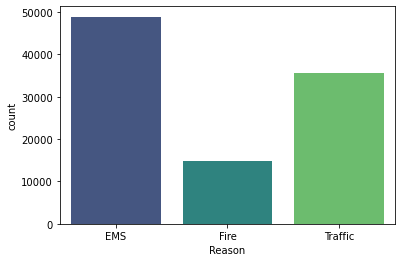

In [55]:
sns.countplot(x='Reason',data=df, palette='viridis')

<AxesSubplot:xlabel='reason', ylabel='Count'>

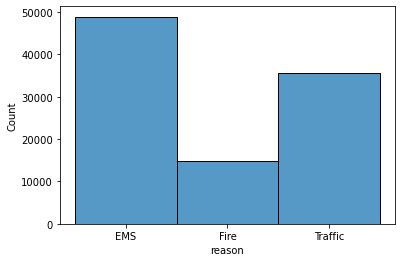

In [42]:
sns.histplot(df['reason'])

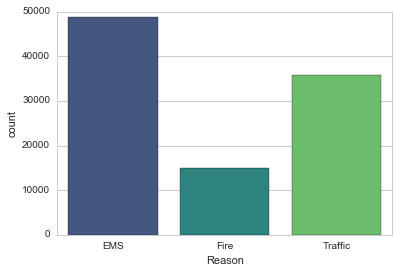

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [58]:
type(df['timeStamp'].iloc[0])

str

In [43]:
df.timeStamp.dtype # 모르겠다 체크

dtype('O')

In [44]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [60]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [61]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df.insert(len(df.columns), 'timeStampDatetimeObject', df['timeStamp'].apply(lambda t: pd.to_datetime(t)))

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,2015-12-10 17:40:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   lat                      99492 non-null  float64       
 1   lng                      99492 non-null  float64       
 2   desc                     99492 non-null  object        
 3   zip                      86637 non-null  float64       
 4   title                    99492 non-null  object        
 5   timeStamp                99492 non-null  object        
 6   twp                      99449 non-null  object        
 7   addr                     98973 non-null  object        
 8   e                        99492 non-null  int64         
 9   reason                   99492 non-null  object        
 10  timeStampStr             99492 non-null  object        
 11  timeStampDatetimeObject  99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)

lat             float64
lng             float64
desc             object
zip             float64
title            object
timeStamp        object
twp              object
addr             object
e                 int64
reason           object
timeStampStr     object
dtype: object

In [70]:
df['timeStampDatetimeObject'].iloc[0].dayofweek

3

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [64]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [66]:
time

Timestamp('2015-12-10 17:40:00')

In [67]:
time.year

2015

In [69]:
df['Hour1'] = df['timeStamp'].apply(lambda time: time.hour)
df['Hour1']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour1, Length: 99492, dtype: int64

In [93]:
df['Month1'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Weeka'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [94]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,...,hour,Month,dayofweek,Reason,Hour1,Month1,Day of Week1,Day of Week2,Day of Week3,Day of Weeka
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,...,17,12,3,Fire,17,12,Thu,NaN,NaN,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,3


In [12]:
df.insert(len(df.columns), 'hour', df['timeStampDatetimeObject'].apply(lambda t: t.hour))

In [13]:

df.insert(len(df.columns), 'Month', df['timeStampDatetimeObject'].apply(lambda t: t.month))
df.insert(len(df.columns), 'dayofweek', df['timeStampDatetimeObject'].apply(lambda t: t.dayofweek))

In [73]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,Month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [79]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [95]:
df['Day of Weeka']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Weeka, Length: 99492, dtype: int64

In [96]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [97]:
df['Day of Weeka'] = df['Day of Weeka'].map(dmap)

In [98]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,...,hour,Month,dayofweek,Reason,Hour1,Month1,Day of Week1,Day of Week2,Day of Week3,Day of Weeka
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,...,17,12,3,Fire,17,12,Thu,NaN,NaN,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,...,17,12,3,EMS,17,12,Thu,NaN,NaN,Thu


In [79]:
dmap[df['dayofweek'][0]]
df.insert(len(df.columns), 'DayOfWeek', df['dayofweek'].apply(lambda d: dmap[d]))

In [81]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,Month,dayofweek,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,2016-08-24 11:06:00,2016-08-24 11:06:00,11,8,2,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,2016-08-24 11:07:02,2016-08-24 11:07:02,11,8,2,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,2016-08-24 11:12:00,2016-08-24 11:12:00,11,8,2,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,2016-08-24 11:17:01,2016-08-24 11:17:01,11,8,2,Wed


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

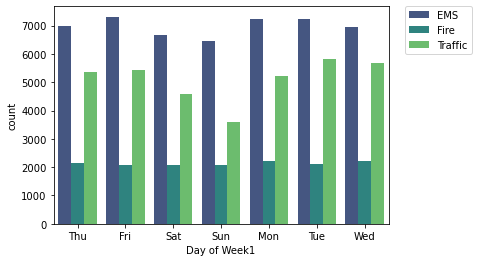

In [109]:
sns.countplot(x='Day of Week1', data=df, hue='Reason', palette='viridis')
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))

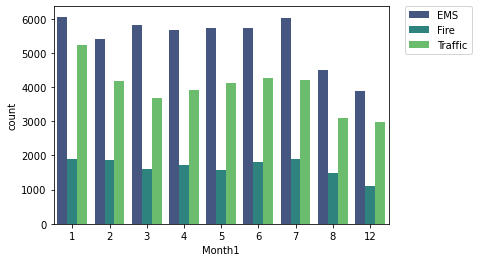

In [110]:
sns.countplot(x='Month1', data=df, hue='Reason', palette='viridis')
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))

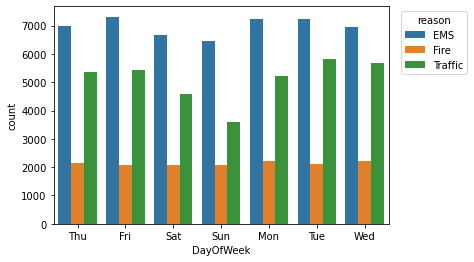

In [94]:
sns.countplot(x='DayOfWeek', hue='reason', data=df)
plt.legend(loc='upper right', title='reason', bbox_to_anchor=(1.25, 1))

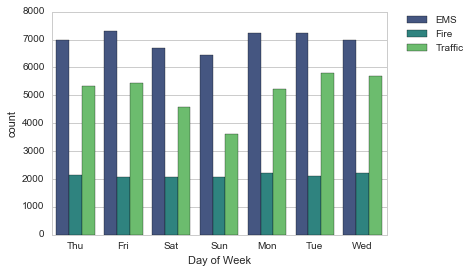

**Now do the same for Month:**

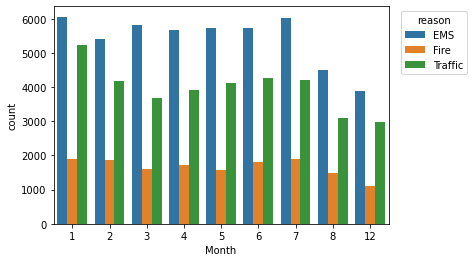

In [95]:
sns.countplot(x='Month', hue='reason', data=df)
plt.legend(loc='upper right', title='reason', bbox_to_anchor=(1.25, 1))

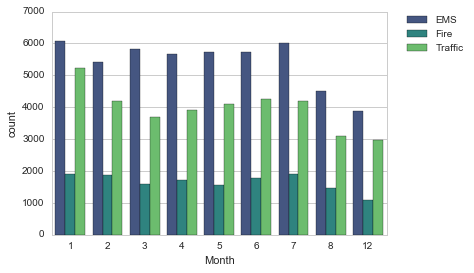

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [98]:
df.groupby('Month').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,dayofweek,DayOfWeek
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

In [100]:
month = df.groupby('Month').count()

<AxesSubplot:xlabel='Month', ylabel='title'>

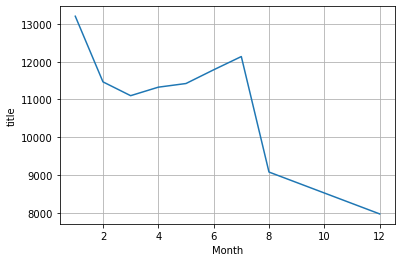

In [102]:
plt.grid()
sns.lineplot(data=month, x="Month", y="title")

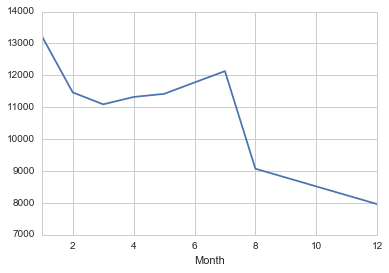

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [110]:
month2 = month.reset_index()
month2.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,dayofweek,DayOfWeek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


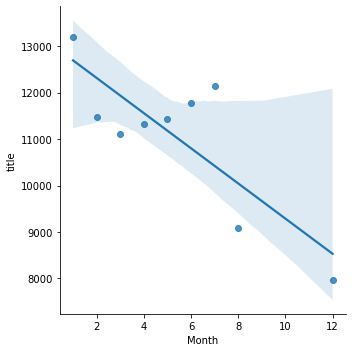

In [113]:
sns.lmplot(data=month2, x="Month", y="title")

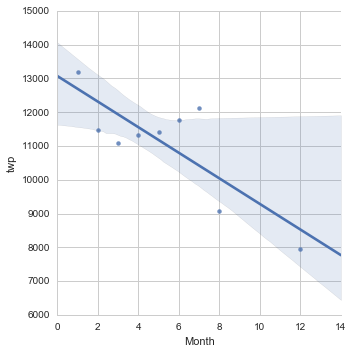

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [117]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,Month,dayofweek,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3,Thu


In [119]:
df.insert(len(df.columns), 'Date', df['timeStampDatetimeObject'].apply(lambda d: d.date()))

In [120]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,Month,dayofweek,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [127]:
dateper = df.groupby('Date').count()

In [128]:
dateper.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,timeStampStr,timeStampDatetimeObject,hour,Month,dayofweek,DayOfWeek
Date,,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447,447


<AxesSubplot:xlabel='Date', ylabel='title'>

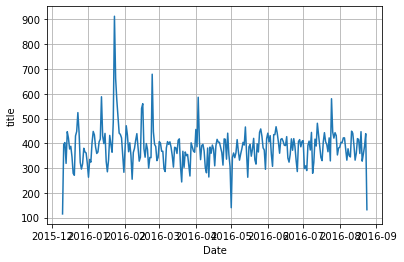

In [129]:
plt.grid()
sns.lineplot(data=dateper, x="Date", y="title")

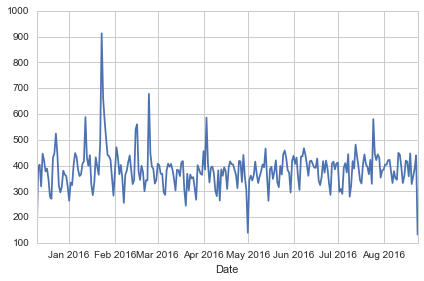

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [142]:
reasons = df.groupby(['reason', 'Date']).count()
reasons.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
reason Date                                                                
EMS    2015-12-10   57   57    57   52     57         57   57    57   57   
       2015-12-11  186  186   186  166    186        186  186   186  186   
       2015-12-12  189  189   189  171    189        189  189   189  189   
       2015-12-13  190  190   190  178    190        190  190   190  190   
       2015-12-14  222  222   222  201    222        222  222   222  222   

                   timeStampStr  timeStampDatetimeObject  hour  Month  \
reason Date                                                             
EMS    2015-12-10            57                       57    57     57   
       2015-12-11           186                      186   186    186   
       2015-12-12           189                      189   189    189   
       2015-12-13           190                      190   190    190   
       2015-12-14           222                      222   222    222   

                   dayofweek  DayOfWeek  
reason Date                              
EMS    2015-12-10         57         57  
       2015-12-11        186        186  
       2015-12-12        189        189  
       2015-12-13        190        190  
       2015-12-14        222        222

In [156]:
reasons.loc[['EMS']]

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
reason Date                                                                
EMS    2015-12-10   57   57    57   52     57         57   57    57   57   
       2015-12-11  186  186   186  166    186        186  186   186  186   
       2015-12-12  189  189   189  171    189        189  189   189  189   
       2015-12-13  190  190   190  178    190        190  190   190  190   
       2015-12-14  222  222   222  201    222        222  222   222  222   
...                ...  ...   ...  ...    ...        ...  ...   ...  ...   
       2016-08-20  159  159   159  139    159        159  159   159  159   
       2016-08-21  165  165   165  144    165        165  165   165  165   
       2016-08-22  182  182   182  163    182        182  182   182  182   
       2016-08-23  218  218   218  200    218        218  218   218  218   
       2016-08-24   71   71    71   59     71         71   71    71   71   

                   timeStampStr  timeStampDatetimeObject  hour  Month  \
reason Date                                                             
EMS    2015-12-10            57                       57    57     57   
       2015-12-11           186                      186   186    186   
       2015-12-12           189                      189   189    189   
       2015-12-13           190                      190   190    190   
       2015-12-14           222                      222   222    222   
...                         ...                      ...   ...    ...   
       2016-08-20           159                      159   159    159   
       2016-08-21           165                      165   165    165   
       2016-08-22           182                      182   182    182   
       2016-08-23           218                      218   218    218   
       2016-08-24            71                       71    71     71   

                   dayofweek  DayOfWeek  
reason Date                              
EMS    2015-12-10         57         57  
       2015-12-11        186        186  
       2015-12-12        189        189  
       2015-12-13        190        190  
       2015-12-14        222        222  
...                      ...        ...  
       2016-08-20        159        159  
       2016-08-21        165        165  
       2016-08-22        182        182  
       2016-08-23        218        218  
       2016-08-24         71         71  

[259 rows x 15 columns]

<AxesSubplot:xlabel='Date', ylabel='title'>

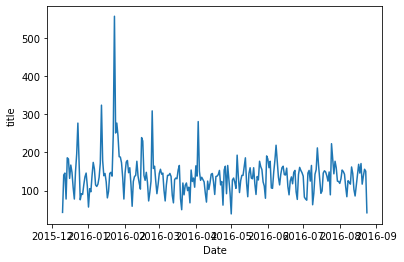

In [158]:
sns.lineplot(data=reasons.loc[['Traffic']], x="Date", y="title")

<AxesSubplot:xlabel='Date', ylabel='title'>

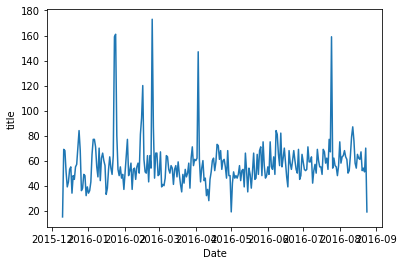

In [159]:
sns.lineplot(data=reasons.loc[['Fire']], x="Date", y="title")

<AxesSubplot:xlabel='Date', ylabel='title'>

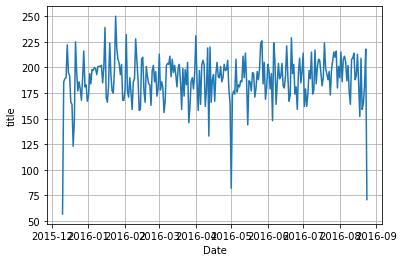

In [161]:
plt.grid()
sns.lineplot(data=reasons.loc[['EMS']], x="Date", y="title")

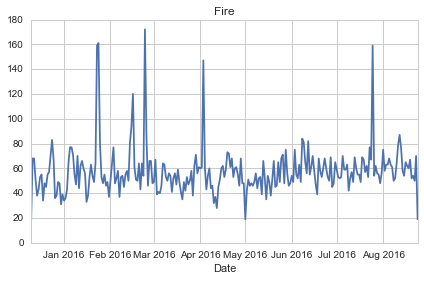

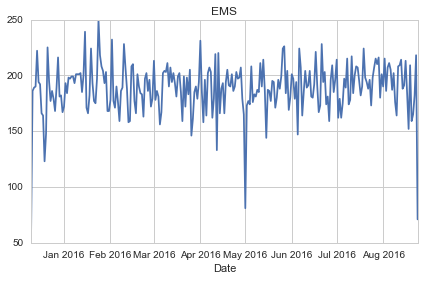

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [17]:
dayHour = df.groupby(by=['dayofweek', 'hour']).count()['reason'].unstack()

In [18]:
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

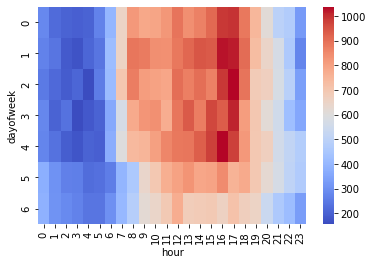

In [20]:
sns.heatmap(dayHour, cmap='coolwarm')

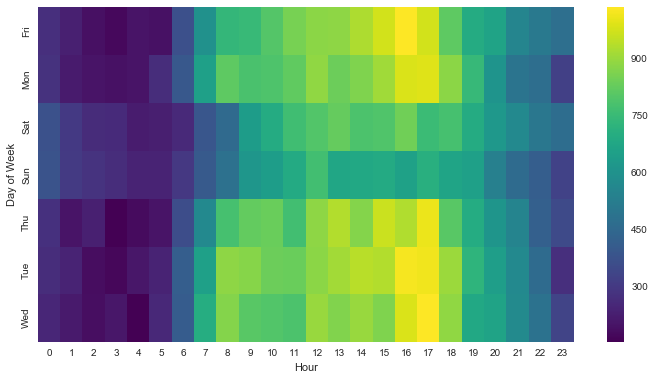

** Now create a clustermap using this DataFrame. **

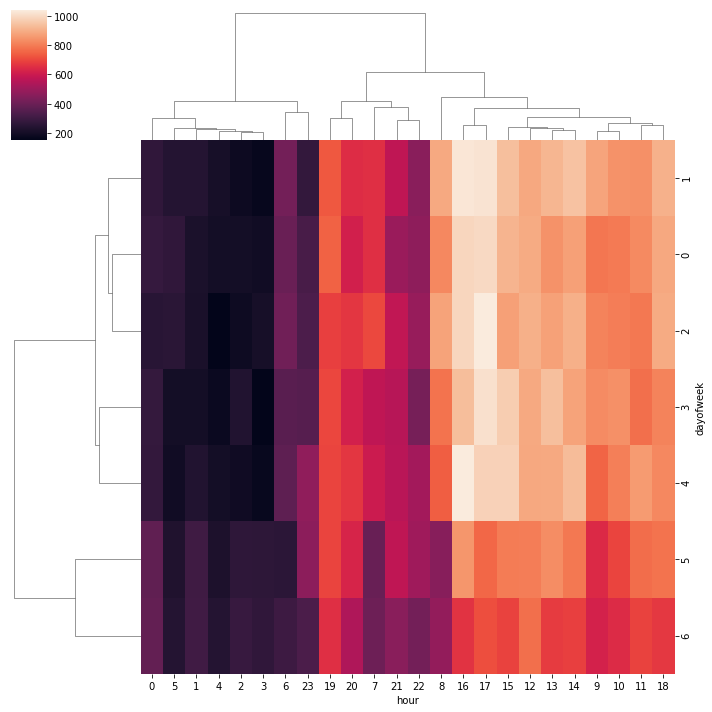

In [21]:
sns.clustermap(dayHour)

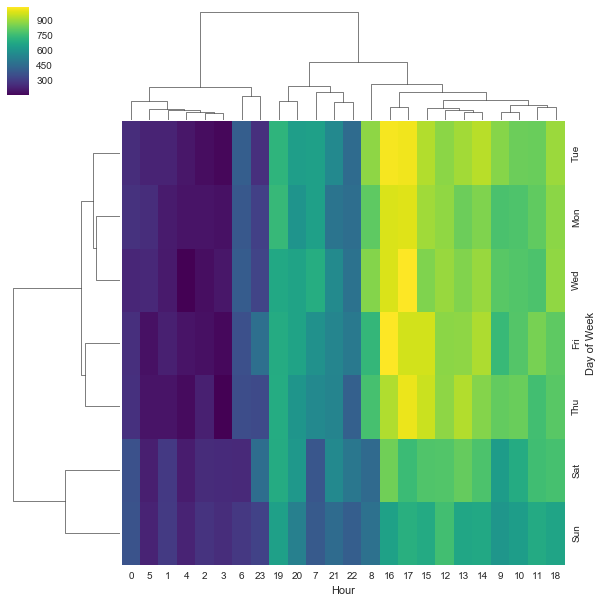

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [24]:
dayMonth = df.groupby(by=['dayofweek', 'Month']).count()['reason'].unstack()

In [26]:
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


<AxesSubplot:xlabel='Month', ylabel='dayofweek'>

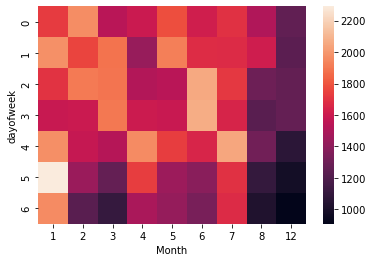

In [28]:
sns.heatmap(dayMonth)

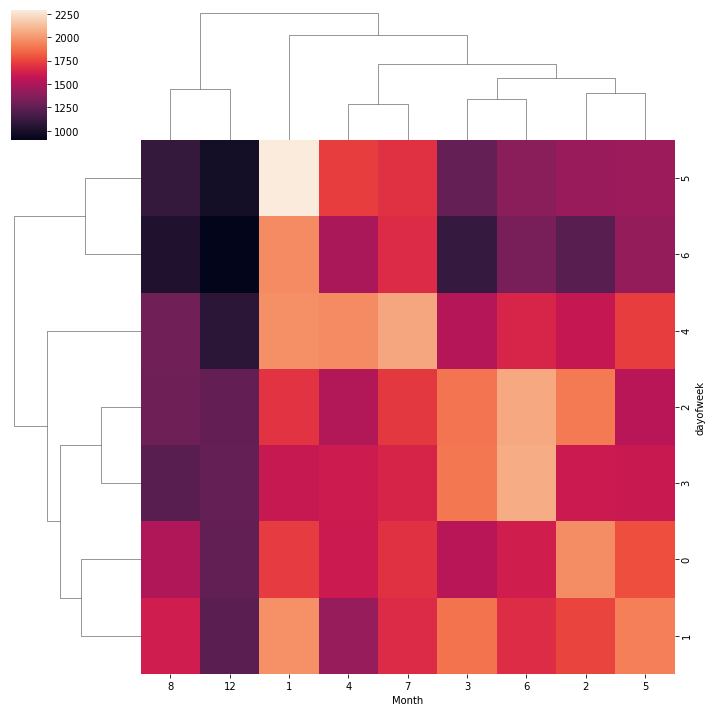

In [29]:
sns.clustermap(dayMonth)

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


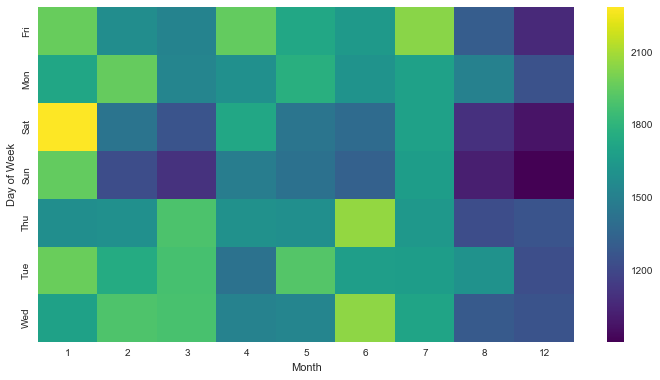

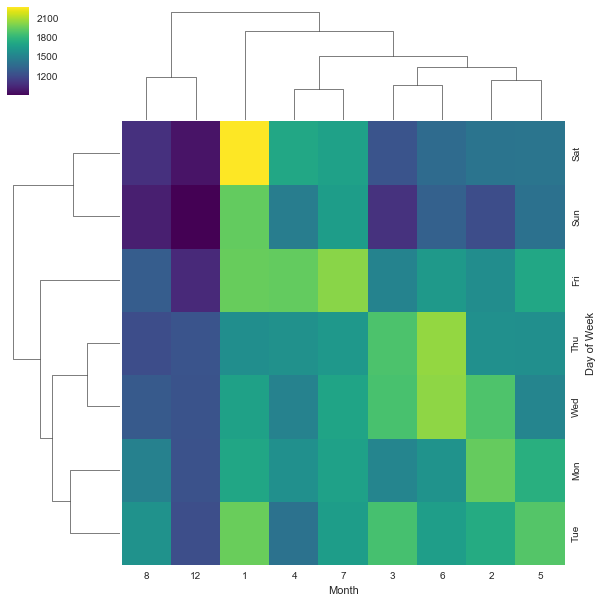

**Continue exploring the Data however you see fit!**
# Great Job!